In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
class K_Means:
    """ My K_Means class
        
        Attributes:
            k (int): Number of clusters
            tolerance (float) : Tolerance Value
            max_iterations (int) : Number of maximum iterations
            centroids (numpy.ndarray) : For storing the Centroid points
            classes (numpy.ndarray) : For storing Classes of all points
    """
    def __init__(self, k=3, tolerance=1e-04, max_iterations=50):
        """For defining values"""
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self, X):
        """For fitting the values and calculating classes"""
        # Randomly initializing Centroids
        self.centroids = X[np.random.randint(X.shape[0], size=self.k)] 
        
        self.classes = np.zeros(X.shape[0], dtype=np.float64)
        # For storing Euclidean Distances between points and centroids
        distances = np.zeros([X.shape[0], self.k], dtype=np.float64) 
        
        for it in range(self.max_iterations):
            for i, c in enumerate(self.centroids):
                # Calculate Euclidean Distances
                distances[:, i] = np.linalg.norm(X - c, axis=1)
            # Storing the class with minimum distance
            self.classes = np.argmin(distances, axis=1)  
            
            # Store previous values of Centroids
            previous = self.centroids 
         
            # Update the value of Centroids
            for j in range(self.k):
                self.centroids[j] = np.mean(X[self.classes == j], 0)
            
            flag = True 
            
            for j in range(self.k):
                prev = previous[j, :]
                curr = self.centroids[j, :]
                # If the change in Centroids is <= Tolerance, then the Centroids are converged
                if np.sum((curr - prev)/curr * 100.0) > self.tolerance:
                    flag = False
                    break
        
            if flag:
                break
            
    def pred(self, data):
        """For predicting and return the predicted class of a data point"""
        distances = np.linalg.norm(data - self.centroids, axis=1)
        # Class predicted is with minimum distance 
        classification = np.argmin(distances, axis=1)        
        return classification

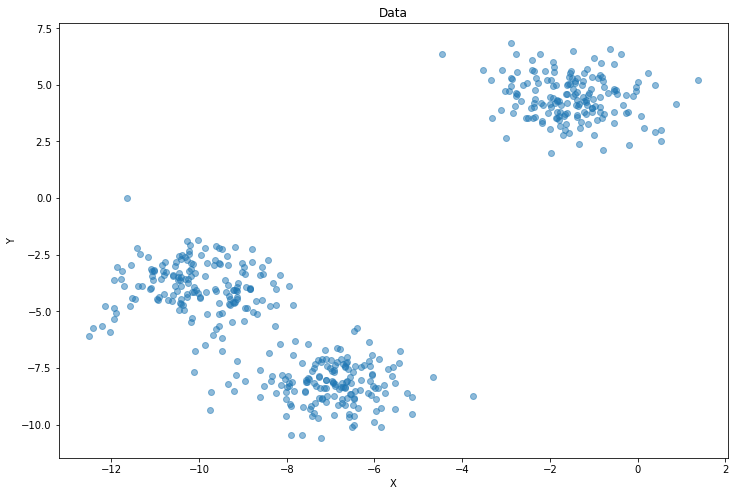

In [14]:
# Creating data points 
# Importing required library
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

# For plotting the points
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Data")
plt.show()

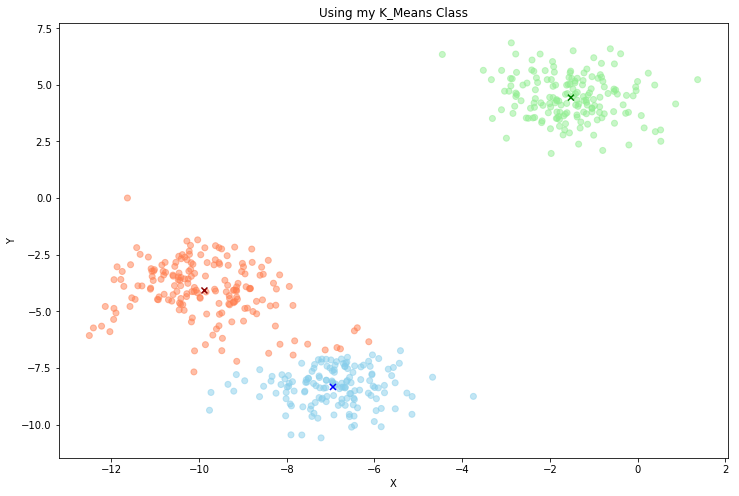

In [15]:
# Using my K_Means class 
km = K_Means(3)
km.fit(X)

# Plotting the points and centroids 
group_colors = ['coral', 'skyblue', 'lightgreen']
colors = [group_colors[j] for j in km.classes]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], color=colors, alpha=0.5)
ax.scatter(km.centroids[:, 0], km.centroids[:, 1], color=['darkred', 'blue', 'green'], marker='x')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Using my K_Means Class")
plt.show()

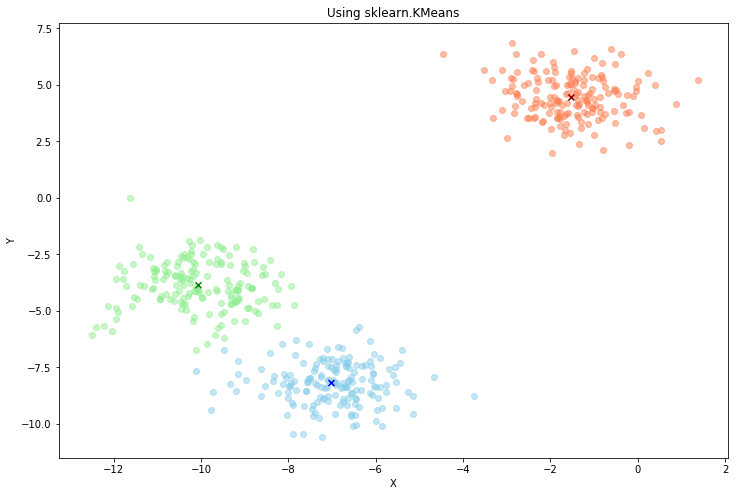

In [12]:
# For comparison with sklearn.KMeans

# Importing required library
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=50, tol=1e-04, random_state=1)
y_km = km.fit_predict(X)

# Plotting the points and centroids
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='coral', alpha=0.5)
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='skyblue', alpha=0.5)
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], c='lightgreen', alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c=['darkred', 'blue', 'green'], marker='x')
ax.set_xlabel('X');
ax.set_ylabel('Y');
plt.title("Using sklearn.KMeans")
plt.show()